In [1]:
import json
def load_normal_json(filepath:str):
    with open(filepath, 'r') as reader:
        json_obj = json.load(reader)
    return json_obj

In [3]:
jsonOne = load_normal_json("./output_tests/one_vlm_one_lift.json")
jsonTwo = load_normal_json("./output_tests/one_vlm_two_lifts.json")
jsonThree = load_normal_json("./output_tests/two_vlms_one_lift.json")
jsonFour = load_normal_json("./output_tests/two_vlms_two_lifts.json")
jsonFive = load_normal_json("./output_tests/two_vlms_one_and_a_half_lift.json")

allJsonFiles = [jsonOne, jsonTwo, jsonThree, jsonFour, jsonFive]

In [23]:
import numpy as np
bins = np.linspace(0, 40, 100)
transformed_json_array = []
for json_file in allJsonFiles:
    avg_of_runs = sum(json_file["totalAverages"]) / len(json_file["totalAverages"])
    standard_dev = np.std(json_file["totalAverages"], ddof=1)
    transformed_json = {
        "name": json_file["name"],
        "standard_dev": standard_dev,
        "avg": avg_of_runs,
        "n": len(json_file["totalAverages"]),
    }
    transformed_json_array.append(transformed_json)
transformed_json_array

[{'name': 'One VLM, One Lift',
  'standard_dev': np.float64(4.751734384999896),
  'avg': 31.689222242426506,
  'n': 2262},
 {'name': 'One VLM, Two Lifts',
  'standard_dev': np.float64(0.2923052221081111),
  'avg': 23.46761306558365,
  'n': 100},
 {'name': 'Two VLMS, One Lift',
  'standard_dev': np.float64(2.136524227779627),
  'avg': 18.27246458904483,
  'n': 461},
 {'name': 'Two VLMS, Two Lifts',
  'standard_dev': np.float64(0.30954177293486423),
  'avg': 14.026966262156247,
  'n': 100},
 {'name': 'Two VLMS, One and a Half Lift',
  'standard_dev': np.float64(1.4757899502877632),
  'avg': 16.83631910824329,
  'n': 224}]

In [21]:
def norm_pdf(x, mu, sigma):
    """Calculate the normal probability density function."""
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

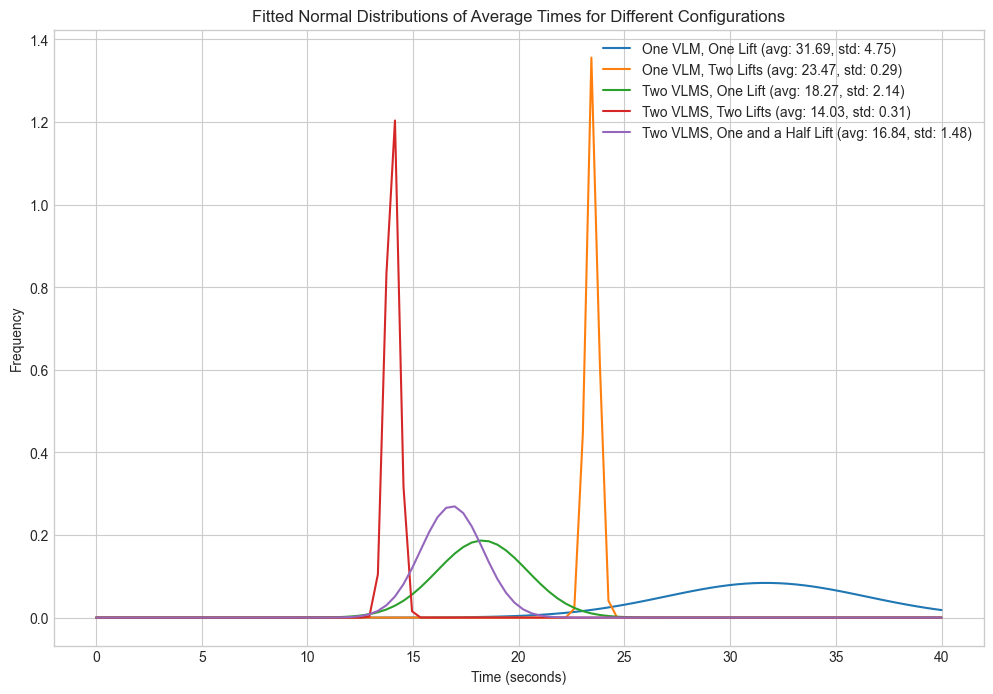

In [43]:
from matplotlib import pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))  # Adjust the size to your needs
for json_file in transformed_json_array:
    y_values = norm_pdf(bins, json_file["avg"], json_file["standard_dev"])
    plt.plot(bins, y_values, label=f"{json_file['name']} (avg: {json_file['avg']:.2f}, std: {json_file['standard_dev']:.2f})")
plt.legend()
plt.title("Fitted Normal Distributions of Average Times for Different Configurations")
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency")
plt.show()


In [31]:
#one minus two
def get_diffs_between_jsons(json_one, json_two):
    delta_mean = json_one["avg"] - json_two["avg"]
    delta_std = np.sqrt(json_one["standard_dev"]**2 + json_two["standard_dev"]**2)
    return {
        "name": f"{json_one['name']} - {json_two['name']}",
        "avg": delta_mean,
        "standard_dev": delta_std,
        "n": json_one["n"] + json_two["n"]
    }



In [50]:
from scipy.stats import norm
diff_one_half_one = get_diffs_between_jsons(transformed_json_array[1], transformed_json_array[2])
diff_one_half_one
prob_first_better = norm.cdf(0, loc=diff_one_half_one["avg"], scale=diff_one_half_one["standard_dev"]) # smaller is better so this is ok
print(f"Prob that first is better than second: {(prob_first_better * 100):.2f}%")
print(f"Prob that second is better than first: {((1-prob_first_better) * 100):.2f}%")


Prob that first is better than second: 0.80%
Prob that second is better than first: 99.20%


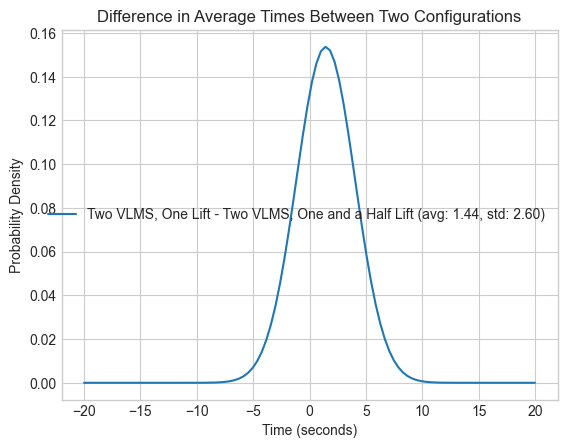

In [33]:
# plot
delta_bins = np.linspace(-20, 20, 100)
y_values = norm_pdf(delta_bins, diff_one_half_one["avg"], diff_one_half_one["standard_dev"])
plt.style.use('seaborn-v0_8-whitegrid')
plt.plot(delta_bins, y_values, label=f"{diff_one_half_one['name']} (avg: {diff_one_half_one['avg']:.2f}, std: {diff_one_half_one['standard_dev']:.2f})")
plt.legend()
plt.title("Difference in Average Times Between Two Configurations")
plt.xlabel("Time (seconds)")
plt.ylabel("Probability Density")
plt.show()